In [1]:
# Import necessary libraries

In [2]:
#Building Recommendation system which will recommend song to user.
# If user_1 is hearing romantic songs,youtube,spotify or any other music player.How it will recommends music or songs to the users same thing we are going to build

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Non-Negative Matrix Factorization
from sklearn.decomposition import NMF

#Clustering Libraries
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

# Loading Dataset

In [4]:
df=pd.read_csv("S:\Excelr\spotify.xls")
df.head()

,Unnamed: 0,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,...,song_4991,song_4992,song_4993,song_4994,song_4995,song_4996,song_4997,song_4998,song_4999,song_5000
0,user_1,2,2,8,8,13,1,4,9,1,...,14,2,14,1,9,0,11,6,14,7
1,user_2,13,5,5,5,12,8,10,10,2,...,10,6,11,1,1,5,12,8,3,0
2,user_3,3,9,2,8,0,1,11,7,3,...,9,5,7,15,12,13,14,5,0,14
3,user_4,2,6,7,8,14,0,12,7,8,...,9,15,9,14,10,6,11,13,6,0
4,user_5,11,12,8,6,13,7,0,7,3,...,12,14,11,11,11,7,3,6,11,7


In [5]:
df=pd.read_csv("S:\Excelr\spotify.xls",index_col=0)
df.head()

,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,song_10,...,song_4991,song_4992,song_4993,song_4994,song_4995,song_4996,song_4997,song_4998,song_4999,song_5000
user_1,2,2,8,8,13,1,4,9,1,2,...,14,2,14,1,9,0,11,6,14,7
user_2,13,5,5,5,12,8,10,10,2,2,...,10,6,11,1,1,5,12,8,3,0
user_3,3,9,2,8,0,1,11,7,3,7,...,9,5,7,15,12,13,14,5,0,14
user_4,2,6,7,8,14,0,12,7,8,1,...,9,15,9,14,10,6,11,13,6,0
user_5,11,12,8,6,13,7,0,7,3,13,...,12,14,11,11,11,7,3,6,11,7


In [6]:
df.shape

(1000, 5000)

# Problem Statement
* We have to build Recommendation system which will recommend songs to user no.1

In [7]:
# This dataset is quiet unique with 5000 columns
# There should be no column unnamed.

In [8]:
# We have to build Recommendation Engine using his lisening history

In [9]:
x=df.values
x


array([[ 2,  2,  8, ...,  6, 14,  7],
       [13,  5,  5, ...,  8,  3,  0],
       [ 3,  9,  2, ...,  5,  0, 14],
       ...,
       [ 6,  2,  1, ..., 13,  6, 13],
       [ 7,  0,  8, ..., 11,  9, 12],
       [ 6, 15,  0, ..., 15,  4,  5]], dtype=int64)

In [10]:
# We have to ignore column heading,and indices and converted into 2*2 matrix

# NMF(Non-Negative Matrix Factorization)

In [11]:
nmf=NMF(n_components=100,max_iter=1000,random_state=3)

* n_components=Genr of Dataset(features) this feature nothing but same like we have 2 parameters genr(comedy and action) here we are considering 100 genr for music.
* max_iter= no.of iteration allowed(usually we keep it as number of user no.of rows

In [12]:
nmf.fit(x)

NMF(max_iter=1000, n_components=100, random_state=3)

In [13]:
user_matrix=nmf.transform(x)
song_matrix=nmf.components_.T

 * user matrix is number of times the user heard that particular song.

In [14]:
user_matrix

array([[0.11406804, 0.00893885, 0.0485635 , ..., 0.        , 0.        ,
        0.6135531 ],
       [0.12688492, 0.00190411, 0.        , ..., 0.        , 0.28640986,
        0.4889945 ],
       [0.16592789, 0.        , 0.        , ..., 0.        , 0.        ,
        0.5284677 ],
       ...,
       [0.        , 0.01646383, 0.00428361, ..., 0.00550799, 0.32831032,
        0.43486855],
       [0.18670744, 0.        , 0.        , ..., 0.        , 0.        ,
        0.61143342],
       [0.01915003, 0.00716057, 0.01531888, ..., 0.00532154, 0.        ,
        0.60172871]])

In [15]:
song_matrix # Pahale row main 1 song ka score 100 criteria(romantic,punjabi etc) mein kitna hai

array([[ 4.14156894,  0.        , 11.87931929, ...,  0.93944426,
         6.78684224,  5.65644275],
       [ 3.64483632,  7.58514655,  0.        , ...,  1.44220399,
         8.52029098,  5.1525928 ],
       [ 4.04813185, 10.43677048,  5.94969038, ...,  6.11269407,
         7.164265  ,  5.42245217],
       ...,
       [ 3.4318137 , 26.98163173, 15.68088812, ...,  2.44361735,
         7.43032225,  5.20597238],
       [ 4.22782543,  0.        ,  0.        , ...,  3.26779781,
         6.94381596,  5.37784402],
       [ 0.21935755, 35.54376171,  0.        , ...,  5.69967641,
         5.26087718,  6.77853971]])

In [16]:
user_matrix.shape

(1000, 100)

In [17]:
song_matrix.shape

(5000, 100)

# Step for building Recommendation system-
# Type 1(for local library and small dataset)
* 1) Consider a recommendation system for first user(row location zero in user matrix)
* 2) Find the Eucleadian Distance between first user and remaining 999 users
* 3) Find top 10 songs heard by neartest 5 users
* 4) Recommend this 10 songs to the first user


In [18]:
# Here we will calculate distance between two users
def col_dist(u1,u2):
    return pow(sum(pow(u1[x] - u2[x],2) for x in range(len(u1))),0.5) 
# 0.5 is square root
# pow(u1[x]-u2[x]^2) is basically distance formula

In [19]:
col_dist(user_matrix[0],user_matrix[1])

0.32430472823393797

In [20]:
def distance_from_remaining_user(buser,user_matrix):
    dist=[]
    for i in range(len(user_matrix)):
        if buser!=i:
            dist.append(col_dist(user_matrix[buser],user_matrix[i]))
    return dist

In [21]:
dist_user1=distance_from_remaining_user(0,user_matrix)

In [22]:
dist_user1

[0.32430472823393797,
 0.14362996437185208,
 0.4020909731386938,
 0.2300091737746997,
 0.21147015784240872,
 0.6695448750917428,
 0.651294304792917,
 0.19293088960241978,
 0.38920422315687936,
 0.34606591125870484,
 0.16566861623123957,
 0.12078014311415695,
 0.3665948924838275,
 0.265420805469526,
 0.14093102411783198,
 0.1406420014580251,
 0.22313903161649012,
 0.4619632739335309,
 0.21068796633308293,
 0.10265895631352763,
 0.47170000021647085,
 0.33062696445887396,
 0.36285225983372055,
 0.6094233746254519,
 0.37599899637551604,
 0.4048833298107977,
 0.9865400770984182,
 0.60017239528913,
 0.3259560932588007,
 0.5773852484520465,
 0.3776062639611444,
 0.3930737560019364,
 0.15003173913496337,
 0.4110852480876146,
 0.2674014421194326,
 0.1384407723227311,
 0.17467132035408736,
 0.15865355506873696,
 0.4349179547344995,
 0.5238070756977298,
 0.19242003092568585,
 0.1821317672194346,
 0.4922172272317869,
 0.15058941950258073,
 0.1662709011279043,
 0.4965189327434661,
 0.19997874001471

In [23]:
#We have to find 5 nearest distance

In [24]:
#argsort sort an array
#Example: It sort the array [40, 10, 30, 20] in ascending order. Therefore, the output is [1 3 2 0]

In [25]:
nearest_users=np.argsort(dist_user1)[:5]

In [26]:
for i in range(len(nearest_users)):
    nearest_users[i]+1
nearest_users

array([206, 608, 584, 313, 459], dtype=int64)

#### Finding most heard song by these users

In [27]:
for i in nearest_users:
    print('songs heard by users',i,'are :')
    temp=df.iloc[i]
    print(temp[temp.values!=0].index)

songs heard by users 206 are :
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4670)
songs heard by users 608 are :
Index(['song_1', 'song_2', 'song_4', 'song_5', 'song_6', 'song_7', 'song_8',
       'song_9', 'song_11', 'song_12',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4667)
songs heard by users 584 are :
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4990', 'song_4991', 'song_4992', 'song_4993', 'song_4994',
       'song_4995', 'song_4996', 'song_4997', 'song_4999', 'song_5000'],
      dtype='object', l

# Top 15 songs 

In [28]:
def topNsongs(nearest_users,df,N):
    temp=df.iloc[nearest_users]
    dict1=temp.max().to_dict()
    
    
    sorted_dict=sorted(dict1.items(),key=lambda keyvalue:(keyvalue[1],keyvalue[0]),reverse=True)[:N]
    return [x[0]for x in sorted_dict]

* Initially my dictionary was like is{song 1:12,song 2:5,song 3:8},after swapping it became like this and the we can easily sort that dictionary because now we have numbers in it
* Key values is a keyword, we have converted that into tuple by using round brackets and square bracket 1 will be in postion 1 and square bracket 0 will be in 1st postion,swapping the postion.
* This will everything will get stored in key-named tuple

In [29]:
topNsongs(nearest_users,df,15)

['song_999',
 'song_995',
 'song_983',
 'song_982',
 'song_974',
 'song_966',
 'song_964',
 'song_958',
 'song_956',
 'song_955',
 'song_95',
 'song_936',
 'song_932',
 'song_930',
 'song_928']

# Type 2 Recommendation System for Larger Dataset
- K-Means Clustering

In [30]:
# TO decide the value of k we use elbow method
# WCSS vs No.of Clusters

In [31]:
WCSS={}
for k in range(1,50):
    kmeans=KMeans(n_clusters=k, max_iter=1000).fit(song_matrix)
    WCSS[k]=kmeans.inertia_

#kmeans inertia says how well a dataset is clustered by kmeans
    

In [32]:
WCSS

{1: 1208534872.4354734,
 2: 1101067727.4182632,
 3: 1061351787.5756156,
 4: 1034964543.8556294,
 5: 1013558962.0948154,
 6: 994592884.5210328,
 7: 981645866.5082603,
 8: 969480399.4500451,
 9: 956371330.1166728,
 10: 951896381.5631502,
 11: 938657319.3539537,
 12: 931547889.8590722,
 13: 927700860.2317666,
 14: 918229916.9311928,
 15: 912797470.3361979,
 16: 909885541.3826225,
 17: 903866201.0801015,
 18: 899056248.5530857,
 19: 895630930.6061544,
 20: 890696334.6494566,
 21: 889803316.8032321,
 22: 887445284.6472409,
 23: 882390536.0806067,
 24: 879716665.4788582,
 25: 877743640.7485577,
 26: 876305087.8819382,
 27: 870471397.0582855,
 28: 869172632.8904133,
 29: 868810339.2551773,
 30: 863618130.0714829,
 31: 864283318.3957138,
 32: 861351165.5255296,
 33: 861554521.0466226,
 34: 858969256.4629029,
 35: 856939245.439002,
 36: 854938418.8041085,
 37: 851969406.6092488,
 38: 851409278.395592,
 39: 849703775.6891624,
 40: 848129519.1901903,
 41: 847228964.8738079,
 42: 845611437.0906044

### Analysis
* Initially we have k=1,there is sum of squared distance between the each data points and centroid of cluster, As shown if we increasing the value of K then WCSS value is decreasing

Text(0, 0.5, 'WCSS')

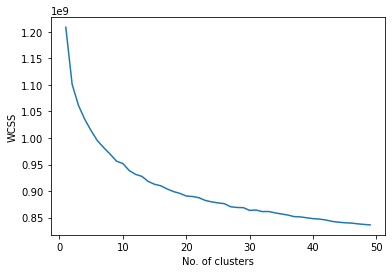

In [33]:
plt.plot(WCSS.keys(),WCSS.values())
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')

## Step 1

In [34]:
def songs_in_cluster1(N_clusters,df,song_matrix,song_name,n_recommendation):
    kmeans=KMeans(n_clusters=N_clusters,max_iter=1000).fit(song_matrix)
    index_in_song=df.columns.to_list().index(song_name)

In [35]:
# We are checking index postion of songs
df.columns.to_list().index('song_45')

44

In [36]:
df.columns.to_list().index('song_5')

4

## Step 2

In [37]:
def songs_in_cluster2(N_clusters,df,song_matrix,song_name,n_recommendation):
    kmeans=KMeans(n_clusters=N_clusters,max_iter=1000).fit(song_matrix)
    index_in_song=df.columns.to_list().index(song_name)
    
    song_vector=song_matrix[index_in_song]

In [38]:
  song_matrix[0] #Song_0 score for each of 100 genr(Criteria)

array([  4.14156894,   0.        ,  11.87931929,   0.        ,
         5.91858895,  22.54273415,  34.94590996,   0.        ,
        23.86023093,   0.        ,   7.57968373,   0.        ,
         0.        ,   0.        ,  72.88139767,  15.65764999,
         0.        ,   0.        ,  19.31974927,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,  49.56327844,  29.56954195,
         0.        ,   0.        ,   0.        ,  43.91140474,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,  87.78177996,   0.        ,
         0.        ,   0.        ,  51.35789074,  18.40512178,
         0.        ,   0.        ,  36.20567122,   0.        ,
         0.        ,   0.        ,   0.        ,  89.24300662,
        10.83301965,  83.8384636 ,   0.        ,  39.9627894 ,
        16.62300026,   0.        ,   0.        ,   0.        ,
       138.44657516,   0.        ,   0.        ,  94.14

# Step 3

In [39]:
def songs_in_cluster3(N_clusters,df,song_matrix,song_name,n_recommendation):
    kmeans=KMeans(n_clusters=N_clusters,max_iter=1000).fit(song_matrix)
    index_in_song=df.columns.to_list().index(song_name) 
    #Print(index_in_song)
    song_vector=song_matrix[index_in_song] 
    #Print(song_vector)
    all_songs_in_cluster=kmeans.predict(song_matrix) 
    print(len(all_songs_in_cluster))

In [40]:
songs_in_cluster3(15,df,song_matrix,'song_5',5) # Right now we did'nt written the n_recommendation code

# In this line we are checking every song is part of any cluster or not

5000


# Step 4

In [45]:
def songs_in_cluster4(N_clusters,df,song_matrix,song_name,n_recommendation):
    kmeans=KMeans(n_clusters=N_clusters,max_iter=1000).fit(song_matrix)
    index_in_song=df.columns.to_list().index(song_name) 
    #Print(index_in_song)
    song_vector=song_matrix[index_in_song] 
    #Print(song_vector)
    all_songs_in_cluster=kmeans.predict(song_matrix) 
    #print(len(all_songs_in_cluster))
    
    #Finding song which belongs to same clusters as of  songs passed in song name
    songs_in_selected_clusters= [x for x in range(len(all_songs_in_cluster))
                                if all_songs_in_cluster[x]==kmeans.predict([song_vector])]
    print(songs_in_selected_clusters)

In [47]:
songs_in_cluster4(15,df,song_matrix,'song_5',5)
# for the given song for song 5, for song 5 we create song_vector,we will find genr score for that song and using that we are going to find out songs_in_selected clusters
# Bascially it give cluster in which song 5 belongs

[4, 14, 22, 50, 54, 80, 82, 129, 159, 164, 181, 198, 207, 219, 264, 279, 296, 312, 322, 324, 330, 341, 383, 404, 405, 419, 420, 453, 458, 459, 472, 508, 551, 567, 574, 575, 623, 652, 665, 666, 680, 697, 699, 717, 734, 738, 744, 772, 789, 792, 795, 806, 831, 835, 852, 853, 863, 872, 882, 900, 903, 925, 927, 955, 969, 998, 1008, 1069, 1072, 1079, 1146, 1149, 1152, 1198, 1235, 1255, 1270, 1272, 1306, 1308, 1355, 1372, 1387, 1403, 1414, 1417, 1425, 1436, 1457, 1473, 1476, 1484, 1486, 1487, 1491, 1533, 1550, 1551, 1566, 1568, 1569, 1574, 1577, 1583, 1603, 1612, 1617, 1651, 1654, 1673, 1684, 1694, 1696, 1706, 1718, 1728, 1741, 1760, 1809, 1826, 1832, 1856, 1866, 1893, 1896, 1904, 1915, 1917, 1923, 1954, 1986, 1997, 2016, 2084, 2085, 2099, 2126, 2143, 2159, 2194, 2200, 2251, 2253, 2274, 2279, 2290, 2321, 2322, 2329, 2354, 2372, 2375, 2419, 2422, 2424, 2433, 2445, 2454, 2484, 2518, 2525, 2543, 2545, 2561, 2592, 2606, 2646, 2657, 2658, 2664, 2678, 2684, 2688, 2695, 2719, 2759, 2766, 2774, 2781,

# Step 5

In [52]:
def songs_in_cluster5(N_clusters,df,song_matrix,song_name,n_recommendation):
    kmeans=KMeans(n_clusters=N_clusters,max_iter=1000).fit(song_matrix)
    index_in_song=df.columns.to_list().index(song_name) 
    #Print(index_in_song)
    song_vector=song_matrix[index_in_song] 
    #Print(song_vector)
    all_songs_in_cluster=kmeans.predict(song_matrix) 
    #print(len(all_songs_in_cluster))
    
    #Finding song which belongs to same clusters as of  songs passed in song name
    songs_in_selected_clusters= [x for x in range(len(all_songs_in_cluster))
                                if all_songs_in_cluster[x]==kmeans.predict([song_vector])]
    #print(songs_in_selected_clusters)
    
    song_cluster=song_matrix[songs_in_selected_clusters]
    #Print(song_clusters)
    
    #This recommendation system(type 2) it does'nt work on a user. We are not finding similar users we are finding similar songs
    # What we are doing for song 5 we are finding nearest 5 songs
    neighbors=NearestNeighbors(n_neighbors=n_recommendation)
    
    neighbors.fit(song_cluster)
    recommended_songs=neighbors.kneighbors([song_matrix[index_in_song]])
    # what will be song 5 vector we will pass in list and we will to ask to find nearest k neighbors
    
    
    print(recommended_songs[1][0])
    

In [53]:
 songs_in_cluster5(15,df,song_matrix,'song_5',5) # These are nothing but song_5 nearest 5 clusters

[  0 136 205 166 301]


# Step 6

In [56]:
def songs_in_cluster6(N_clusters,df,song_matrix,song_name,n_recommendation):
    kmeans=KMeans(n_clusters=N_clusters,max_iter=1000).fit(song_matrix)
    index_in_song=df.columns.to_list().index(song_name) 
    #Print(index_in_song)
    song_vector=song_matrix[index_in_song] 
    #Print(song_vector)
    all_songs_in_cluster=kmeans.predict(song_matrix) 
    #print(len(all_songs_in_cluster))
    
    #Finding song which belongs to same clusters as of  songs passed in song name
    songs_in_selected_clusters= [x for x in range(len(all_songs_in_cluster))
                                if all_songs_in_cluster[x]==kmeans.predict([song_vector])]
    #print(songs_in_selected_clusters)
    
    song_cluster=song_matrix[songs_in_selected_clusters]
    #Print(song_clusters)
    
    #This recommendation system(type 2) it does'nt work on a user. We are not finding similar users we are finding similar songs
    # What we are doing for song 5 we are finding nearest 5 songs
    neighbors=NearestNeighbors(n_neighbors=n_recommendation)
    
    neighbors.fit(song_cluster)
    recommended_songs=neighbors.kneighbors([song_matrix[index_in_song]])
    # what will be song 5 vector we will pass in list and we will to ask to find nearest k neighbors
    
    #print(recommended_songs[1][0])
    song=df.columns
    return [song[x] for x in recommended_songs[1][0]]

In [58]:
songs_in_cluster6(15,df,song_matrix,'song_5',5)

['song_1', 'song_138', 'song_205', 'song_168', 'song_307']

* In reality there are millions of songs in music player but there is same type of  approach everywhere